Задание №1

In [1]:
import numpy as np

import matplotlib.pyplot as plt
def f(x):
    return np.exp(-np.dot(x.T, x)) * x

# Метод конечной разности для вычисления частной производной по i-му аргументу
def finite_difference(f, x, i, alpha):
    x_alpha = np.copy(x)
    x_alpha[i] += alpha
    return (f(x_alpha) - f(x)) / alpha

# Метод комплексного приращения для вычисления частной производной по i-му аргументу
def complex_step(f, x, i, alpha):
    x_complex = np.copy(x).astype(complex)
    x_complex[i] += 1j * alpha
    return np.imag(f(x_complex)) / alpha

In [2]:
x = np.ones(10)

p_values = np.arange(-300, 0, dtype=np.float64)
alpha_values = 10 ** p_values


max_derivatives = {'finite_difference': [], 'complex_step': []}

for alpha in alpha_values:
    for i in range(len(x)):
        fd_derivative = finite_difference(f, x, i, alpha)
        cs_derivative = complex_step(f, x, i, alpha)
        max_derivatives['finite_difference'].append(fd_derivative)
        max_derivatives['complex_step'].append(cs_derivative)

for i in range(len(x)):
    print(f"max {i} fd derivative: {max_derivatives['finite_difference'][i]}")
    print(f"max {i} cs derivative: {max_derivatives['complex_step'][i]}")


max 0 fd derivative: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
max 0 cs derivative: [-4.53999298e-05 -9.07998595e-05 -9.07998595e-05 -9.07998595e-05
 -9.07998595e-05 -9.07998595e-05 -9.07998595e-05 -9.07998595e-05
 -9.07998595e-05 -9.07998595e-05]
max 1 fd derivative: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
max 1 cs derivative: [-9.07998595e-05 -4.53999298e-05 -9.07998595e-05 -9.07998595e-05
 -9.07998595e-05 -9.07998595e-05 -9.07998595e-05 -9.07998595e-05
 -9.07998595e-05 -9.07998595e-05]
max 2 fd derivative: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
max 2 cs derivative: [-9.07998595e-05 -9.07998595e-05 -4.53999298e-05 -9.07998595e-05
 -9.07998595e-05 -9.07998595e-05 -9.07998595e-05 -9.07998595e-05
 -9.07998595e-05 -9.07998595e-05]
max 3 fd derivative: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
max 3 cs derivative: [-9.07998595e-05 -9.07998595e-05 -9.07998595e-05 -4.53999298e-05
 -9.07998595e-05 -9.07998595e-05 -9.07998595e-05 -9.07998595e-05
 -9.07998595e-05 -9.07998595e-05]
max 4 fd derivative: [0. 0. 0. 0. 0. 0. 0. 0. 0.

In [3]:
print(max_derivatives['complex_step'][0])

[-4.53999298e-05 -9.07998595e-05 -9.07998595e-05 -9.07998595e-05
 -9.07998595e-05 -9.07998595e-05 -9.07998595e-05 -9.07998595e-05
 -9.07998595e-05 -9.07998595e-05]


Задание №2

/tmp/ipykernel_17410/2941219565.py:12: RuntimeWarning: overflow encountered in exp
  return np.exp(-np.dot(x, x)) * x
/tmp/ipykernel_17410/2941219565.py:12: RuntimeWarning: invalid value encountered in multiply
  return np.exp(-np.dot(x, x)) * x


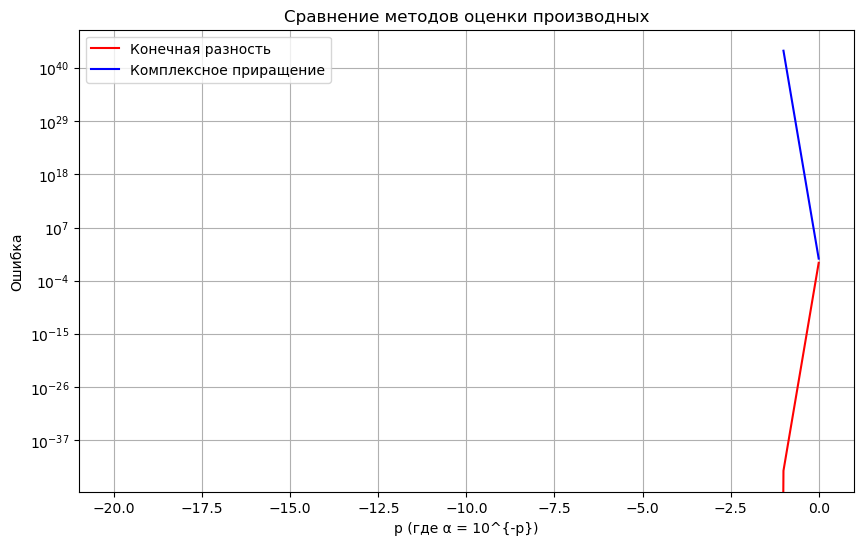

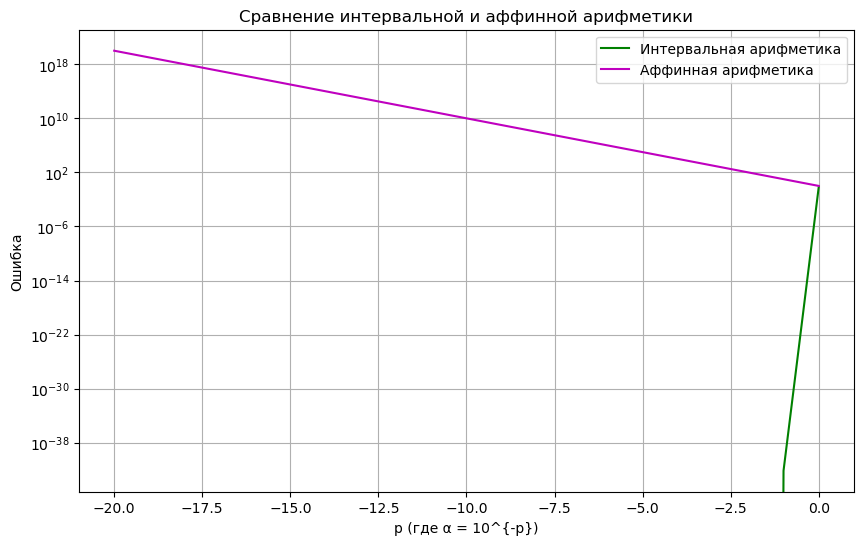

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# === Определение функции f ===
def f(x):
    """
    Функция f(𝐱) = exp(-𝐱^T ⋅ 𝐱) ⋅ 𝐱.

    :param x: Вектор входных аргументов
    :return: Значение функции
    """
    return np.exp(-np.dot(x, x)) * x

# === Оценка производной методом конечной разности ===
def finite_difference(f, x, alpha):
    """
    Оценка частных производных методом конечной разности.

    :param f: Целевая функция
    :param x: Точка, в которой вычисляется производная
    :param alpha: Малое приращение
    :return: Оценки производных по каждому аргументу
    """
    derivatives = []
    for i in range(len(x)):
        x_forward = x.copy()
        x_forward[i] += alpha
        derivative = (f(x_forward) - f(x)) / alpha
        derivatives.append(derivative)
    return np.array(derivatives)

# === Оценка производной методом комплексного приращения ===
def complex_step_derivative(f, x, alpha):
    """
    Оценка частных производных методом комплексного приращения.

    :param f: Целевая функция
    :param x: Точка, в которой вычисляется производная
    :param alpha: Малое приращение
    :return: Оценки производных по каждому аргументу
    """
    derivatives = []
    for i in range(len(x)):
        x_complex = x.astype(complex)
        x_complex[i] += 1j * alpha
        derivative = np.imag(f(x_complex)) / alpha
        derivatives.append(derivative)
    return np.array(derivatives)

# === Интервальная арифметика ===
class Intv:
    def __init__(self, lo, hi):
        self.lo = float(lo)
        self.hi = float(hi)

    def __mul__(self, other):
        return Intv(
            min(self.lo * other.lo, self.lo * other.hi, self.hi * other.lo, self.hi * other.hi),
            max(self.lo * other.lo, self.lo * other.hi, self.hi * other.lo, self.hi * other.hi)
        )

    def func(self):
        exp_lo = np.exp(-self.hi**2)
        exp_hi = np.exp(-self.lo**2)
        return Intv(self.lo * exp_lo, self.hi * exp_hi)

# === Аффинная арифметика ===
class Affn:
    def __init__(self, c, k):
        self.c = float(c)
        self.k = float(k)

    def func(self):
        exp_k = np.exp(-self.k**2)
        return Affn(self.c * exp_k, self.k * exp_k)

# === Основной блок программы ===
# Определение параметров
p_range = range(-20, 1)
errors_fd = []
errors_cs = []
alphas = []

# Исходные данные
x = np.array([0.0, 0.0])  # Начальные значения аргументов

for p in p_range:
    alpha = 10 ** -p
    alphas.append(alpha)

    # Оценка производных
    fd = finite_difference(f, x, alpha)
    cs = complex_step_derivative(f, x, alpha)

    errors_fd.append(np.linalg.norm(fd))
    errors_cs.append(np.linalg.norm(cs))

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(p_range, errors_fd, label='Конечная разность', color='r')
plt.plot(p_range, errors_cs, label='Комплексное приращение', color='b')
plt.yscale('log')
plt.xlabel('p (где α = 10^{-p})')
plt.ylabel('Ошибка')
plt.title('Сравнение методов оценки производных')
plt.legend()
plt.grid()
plt.show()

# Интервальная и аффинная арифметика
intv_results = []
affn_results = []

for p in p_range:
    alpha = 10 ** -p
    intv = Intv(-alpha, alpha)
    affn = Affn(-alpha, 0)

    intv_res = intv.func()
    affn_res = affn.func()

    intv_results.append(intv_res.hi - intv_res.lo)
    affn_results.append(abs(affn_res.c))

# График для интервальной и аффинной арифметики
plt.figure(figsize=(10, 6))
plt.plot(p_range, intv_results, label='Интервальная арифметика', color='g')
plt.plot(p_range, affn_results, label='Аффинная арифметика', color='m')
plt.yscale('log')
plt.xlabel('p (где α = 10^{-p})')
plt.ylabel('Ошибка')
plt.title('Сравнение интервальной и аффинной арифметики')
plt.legend()
plt.grid()
plt.show()
